### Preparando o ambiente

In [2]:
import os
import numpy as np
import sys

In [3]:
# Caminhos para os arquivos
base_dir = os.getcwd()
X_txt_path = os.path.join(base_dir, "..", "CARACTERES_COMPLETO", "X.txt")
Y_txt_path = os.path.join(base_dir, "..", "CARACTERES_COMPLETO", "Y_letra.txt")

In [4]:
sys.path.append("../../WORKIA")

In [5]:
os.chdir("..")
print(os.getcwd())

c:\Users\Luiz\Desktop\final\WorkIA-main


In [6]:
from MLP.mlp import MLP
from MLP.trainer import *
from MLP.losses.loss_crossentropy import LossCrossEntropy
from MLP.losses.loss_mse import LossMSE
from MLP.activation_functions.ReLU import ReLU
from MLP.activation_functions.softmax import Softmax
from MLP.activation_functions.sigmoid import Sigmoid
import os
import itertools

# Carrega X do .txt manualmente, ignorando valores vazios
X = []
with open(X_txt_path, "r") as f:
    for linha in f:
        valores = [val.strip() for val in linha.strip().split(",") if val.strip() != ""]
        if valores:  # ignora linhas totalmente vazias
            X.append([float(v) for v in valores])

X = np.array(X, dtype=np.float32)

# Verifica se todas as linhas têm o mesmo tamanho
comprimentos = [len(linha) for linha in X]
if len(set(comprimentos)) > 1:
    raise ValueError(f"Linhas com tamanhos diferentes detectadas: {set(comprimentos)}")

# Normaliza X (média 0, desvio 1), com segurança contra divisão por zero
X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-7)

# Carrega Y e converte para índices (A=0, ..., Z=25)
with open(Y_txt_path, "r") as f:
    letras = [linha.strip() for linha in f]
letra_to_index = {chr(i + 65): i for i in range(26)}
y_raw = np.array([letra_to_index[l] for l in letras])
n_classes = 26

# One-hot encoding
y = np.zeros((len(y_raw), n_classes))
y[np.arange(len(y_raw)), y_raw] = 1

In [7]:
# determina o conjunto de treino e teste
X_train = X[:-130]
y_train = y[:-130]
X_test = X[-130:]
y_test = y[-130:]

### Dinâmica de treinamento e teste - Tempo de Execução

In [8]:
alphas = np.arange(0.1, 1.1, 0.1)
n_epochs = np.arange(100, 1100, 100)
n_neurons = np.arange(10, 110, 10)

alpha = 0.1
epochs = 1000
neurons = 60

combinations_alpha = list(itertools.product([alpha], n_epochs, n_neurons))
combinations_epochs = list(itertools.product(alphas, [epochs], n_neurons))
combinations_neurons = list(itertools.product(alphas, n_epochs, [neurons]))

combinations_all = [combinations_alpha, combinations_epochs, combinations_neurons]

In [9]:
import time

exec_times = []
for combinations in combinations_all:
    for comb in combinations:
        start_time = time.time()

        np.random.seed(42)
        random.seed(42)

        # Define arquitetura da MLP
        n_inputs = X.shape[1]
        configs = [
            (comb[2], n_inputs, ReLU()),
            (n_classes, comb[2], Sigmoid())
        ]

        trainer = BackPropagation(LossMSE(), learning_rate=comb[0], epochs=comb[1])
        mlp = MLP(configs, trainer)

        # Treinamento
        mlp.train(X_train, y_train)

        end_time = time.time()

        exec_time = end_time - start_time
        exec_times.append(exec_time)

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 100
Learning rate: 0.1
Number of layers: 2
Architecture:
  Layer 1: 10 neurons - Activation: relu
  Layer 2: 26 neurons - Activation: sigmoid

Epoch 1/100 - Loss: 0.250063
Epoch 100/100 - Loss: 0.037034
      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 100
Learning rate: 0.1
Number of layers: 2
Architecture:
  Layer 1: 20 neurons - Activation: relu
  Layer 2: 26 neurons - Activation: sigmoid

Epoch 1/100 - Loss: 0.250064
Epoch 100/100 - Loss: 0.036989
      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 100
Learning rate: 0.1
Number of layers: 2
Architecture:
  Layer 1: 30 neurons - Activation: relu
  Layer 2: 26 neurons - Activation: sigmoid

Epoch 1/100 - Loss: 0.249791
Epoch 100/100 - Loss: 0.036806
      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 100
Learning rate: 0.1
Number of layers

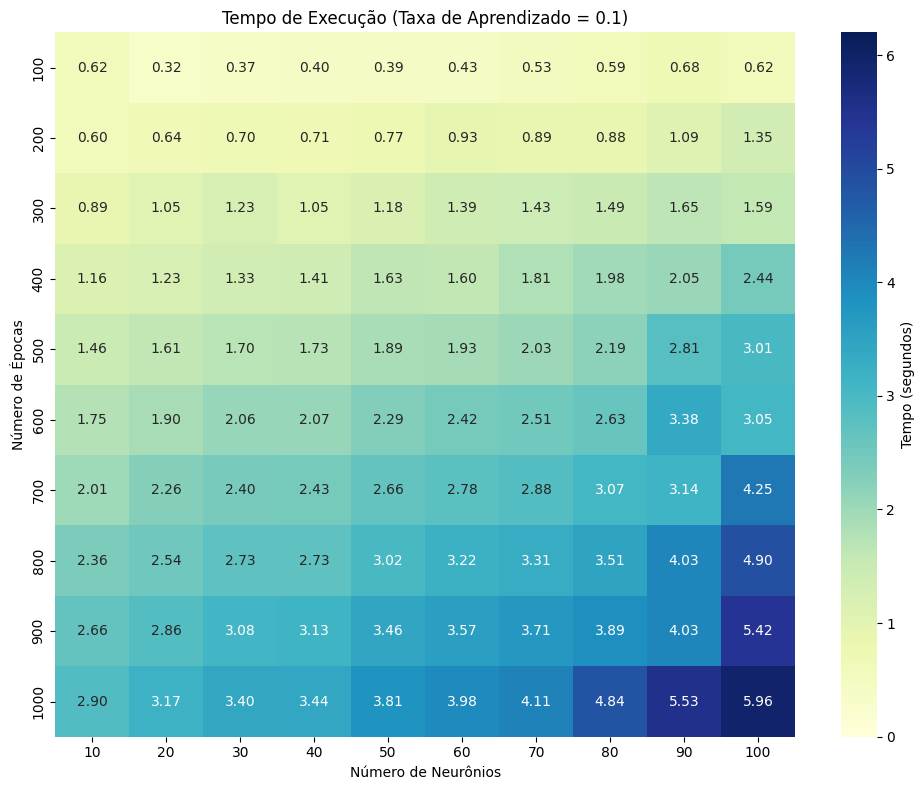

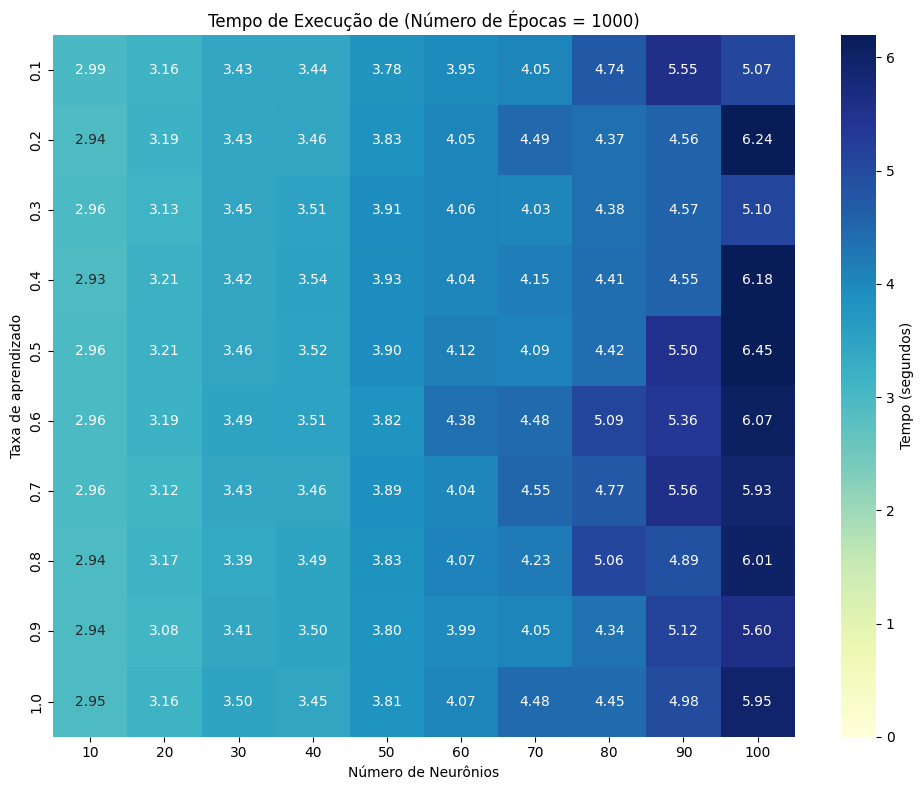

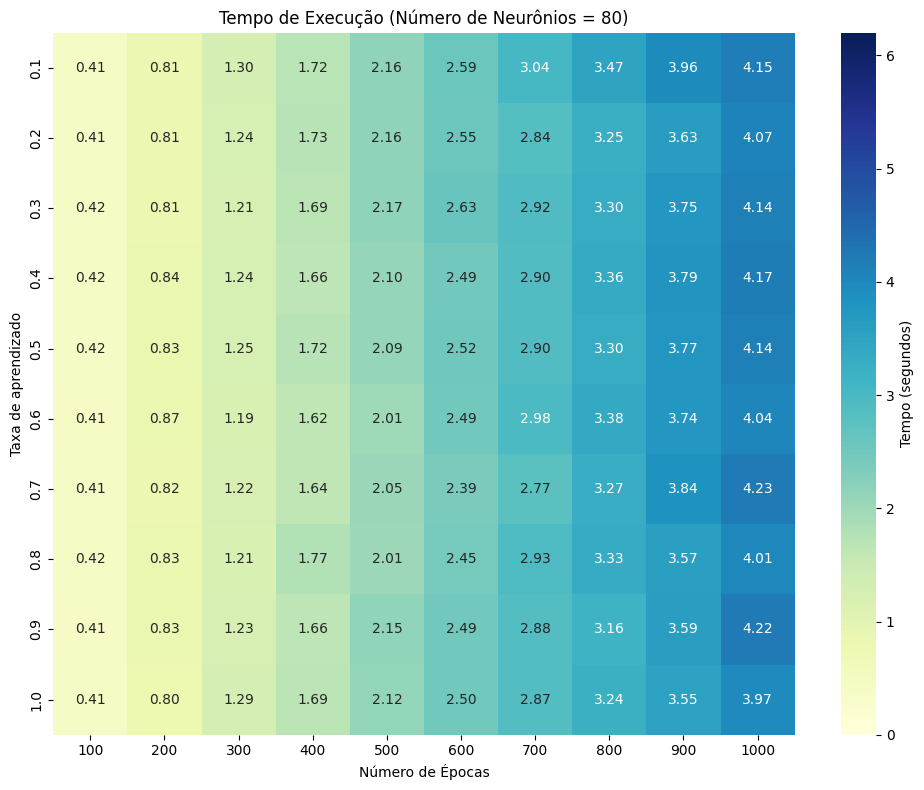

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(data_slice, xticks, yticks, xlabel, ylabel, title):
    # Converte vetor de acurácias para matriz 10x10
    matriz = np.array(data_slice).reshape((10, 10))

    # Gera o heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz, xticklabels=xticks, yticklabels=yticks, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=6.2, 
                cbar_kws={"label": "Tempo (segundos)"})
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1º Heatmap
xticks1 = np.arange(10, 110, 10)  # Número de neurônios
yticks1 = np.arange(100, 1100, 100)  # Número de épocas
plot_heatmap(exec_times[:100], xticks1, yticks1, "Número de Neurônios", "Número de Épocas", "Tempo de Execução (Taxa de Aprendizado = 0.1)")

# 2º Heatmap
xticks2 = np.arange(10, 110, 10)  # Número de neurônios
yticks2 = np.round(np.linspace(0.1, 1.0, 10), 2)  # Taxa de aprendizado
plot_heatmap(exec_times[100:200], xticks2, yticks2, "Número de Neurônios", "Taxa de aprendizado", "Tempo de Execução de (Número de Épocas = 1000)")

# 3º Heatmap
xticks3 = np.arange(100, 1100, 100)  # Número de épocas
yticks3 = np.round(np.linspace(0.1, 1.0, 10), 2)  # Taxa de aprendizado
plot_heatmap(exec_times[200:], xticks3, yticks3, "Número de Épocas", "Taxa de aprendizado", "Tempo de Execução (Número de Neurônios = 80)")


### Dinâmica de treinamento e teste - Visão geral

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import string  # Para pegar as letras do alfabeto

def getConfusionMatrix(real, pred):
    # Supondo que você já tenha real_classes e predicted_classes
    cm = confusion_matrix(real, pred)
    labels = list(string.ascii_uppercase)  # ['A', 'B', ..., 'Z']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()


      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 1000
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 64 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00185659 -0.01106335
  -0.01196207]
 [ 0.00812526  0.0135624  -0.0007201  ...  0.02190456 -0.00990536
  -0.00566298]
 [ 0.00099651 -0.00503476 -0.01550663 ... -0.01514847 -0.00446515
   0.00856399]
 ...
 [ 0.00250628  0.00808571 -0.00264356 ...  0.01679747  0.00342106
   0.01917259]
 [-0.01525572 -0.01154163  0.00855202 ... -0.0039157   0.01505062
  -0.01080003]
 [ 0.00162797  0.0149503  -0.01312969 ... -0.03601085 -0.0070129
  -0.00875815]]


[[ 5.32783209e-03 -8.05526683e-03 -2.15113800e-03 ...  9.94558236e-03
  -7.61760371e-03 -2.99696057e-03]
 [ 1.57587581e-02 -4.77992504e-04 -7.26774138e-03 ...  1.66493127e-03
   1.54273637e-02  2.43475077e-03]
 [-4.04157159e-03  1.79487288e-05  1.17707418e-03 

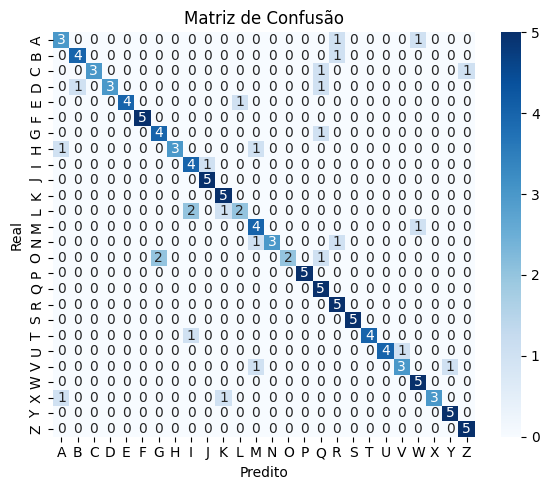

In [11]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (64, n_inputs, ReLU()),
    (n_classes, 64, Sigmoid())
]

trainer = BackPropagation(LossMSE(), learning_rate=0.3, epochs=1000)
mlp = MLP(configs, trainer)

# Treinamento
mlp.train(X_train, y_train)

# Avaliação
predictions = mlp.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
real_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == real_classes)
print(f"Acurácia final: {accuracy:.4f}")

getConfusionMatrix(real_classes, predicted_classes)


### Determinação de parâmetros

- os parâmetros são determinados diretamente no código
- parâmetros variáveis: taxa de aprendizado, número de épocas, número de neurônios na camada oculta, funções de ativação (são os principais que alteramos para testar o modelo)
- a busca por melhores parâmetros foi feito através do random search (resultados não satisfatórios) e grid search

### Treinamento

In [54]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (80, n_inputs, ReLU()),
    (n_classes, 80, Sigmoid())
]

trainer = BackPropagation(LossMSE(), learning_rate=0.3, epochs=800)
mlp = MLP(configs, trainer)

# Treinamento
mlp.train(X_train, y_train)

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 800
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

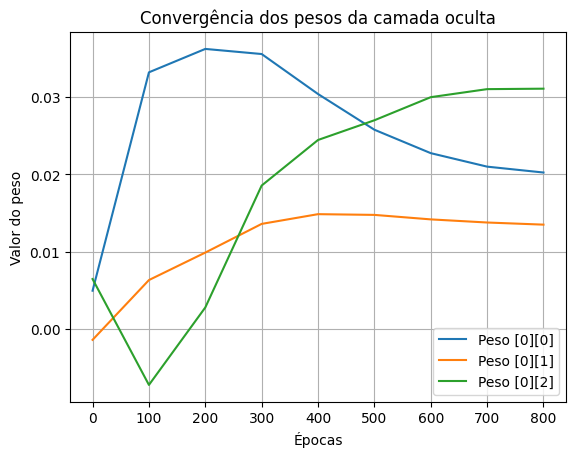

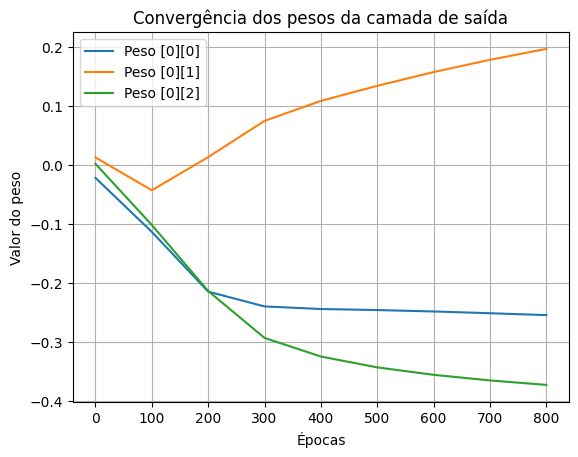

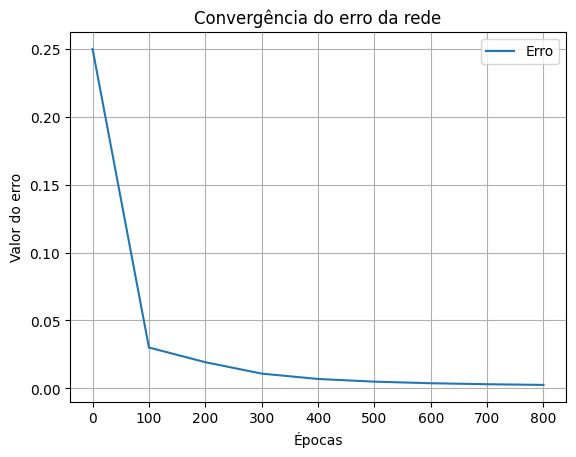

In [13]:
import matplotlib.pyplot as plt

# Valores dos pesos ao longo de 8 épocas (exemplo)
pesos_camada1 = [0.00496714, -0.00138264, 0.00647689,
-0.02197501, 0.01268714, 0.00190223,
3.31936705e-02, 6.34445965e-03, -7.20809007e-03,
-0.11360121, -0.04300986, -0.10188617,
0.03621707, 0.00989748, 0.00280316,
-0.21488853, 0.01317645, -0.21388023,
0.03555664, 0.01360348, 0.01855963,
-0.24001342, 0.07465289, -0.29343009,
3.03890085e-02, 1.48611162e-02, 2.44483990e-02,
-2.44406205e-01, 1.08520642e-01, -3.24974848e-01,
0.02577427, 0.01476662, 0.02699577,
-0.24616088, 0.13412637, -0.34338479,
0.02274534, 0.01418608, 0.02998156,
-0.24856458, 0.15743181, -0.35599085,
0.02100294, 0.01378265, 0.03101957,
-0.2515296, 0.17826181, -0.3654887,
0.0202425, 0.01350697, 0.03107826,
-0.25473069, 0.19667739, -0.3731262]

e = [0.249846, 
0.030082,
0.019298,
0.010891,
0.006934,
0.004972,
0.003813,
0.003069,
0.002562]

p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
p6 = []

for i in range(0, len(pesos_camada1), 6):
    p1.append(pesos_camada1[i])
    p2.append(pesos_camada1[i+1])
    p3.append(pesos_camada1[i+2])
    p4.append(pesos_camada1[i+3])
    p5.append(pesos_camada1[i+4])
    p6.append(pesos_camada1[i+5])

epocas = list(range(0, 801, 100))

# Plotando a convergência
plt.plot(epocas, p1, label="Peso [0][0]")
plt.plot(epocas, p2, label="Peso [0][1]")
plt.plot(epocas, p3, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada oculta")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, p4, label="Peso [0][0]")
plt.plot(epocas, p5, label="Peso [0][1]")
plt.plot(epocas, p6, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada de saída")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, e, label="Erro")
plt.xlabel("Épocas")
plt.ylabel("Valor do erro")
plt.title("Convergência do erro da rede")
plt.legend()
plt.grid(True)
plt.show()

### Parada Antecipada

- 1ª Parada Antecipada

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 150
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid


PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.011063

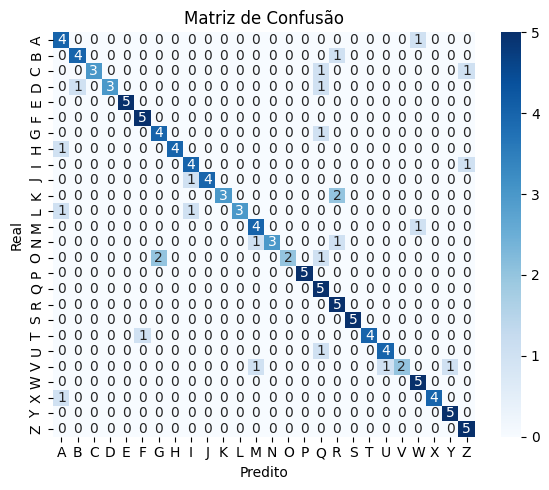

In [9]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (80, n_inputs, ReLU()),
    (n_classes, 80, Sigmoid())
]

trainer = BackPropagationES(LossMSE(), learning_rate=0.3, epochs=150)
mlp = MLP(configs, trainer)

# Treinamento
mlp.train(X_train, y_train)

# Avaliação
predictions = mlp.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
real_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == real_classes)
print(f"Acurácia final: {accuracy:.4f}")

getConfusionMatrix(real_classes, predicted_classes)

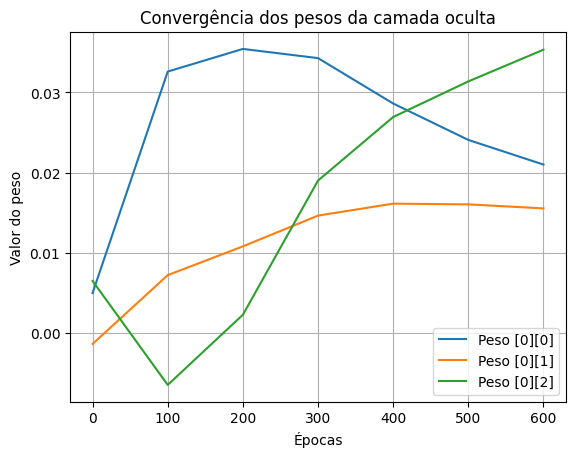

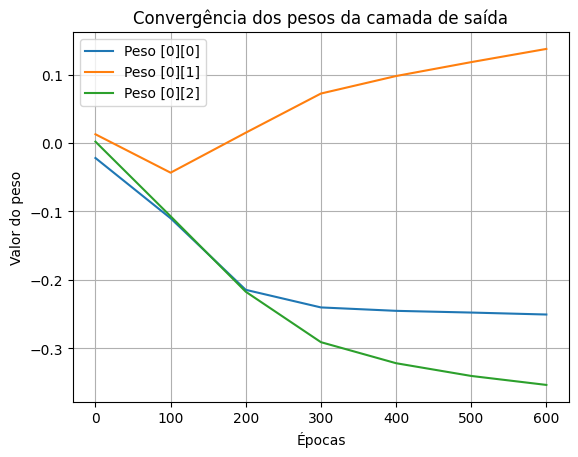

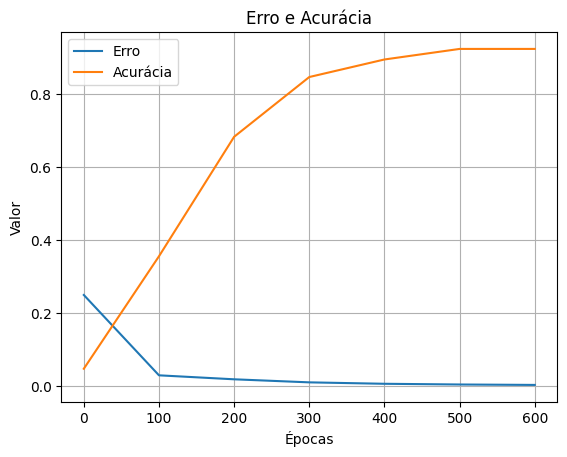

In [15]:
import matplotlib.pyplot as plt

# Valores dos pesos ao longo de 8 épocas (exemplo)
pesos_camada1 = [0.00496714, -0.00138264,  0.00647689,
-0.02197501,  0.01268714,  0.00190223,
0.03259427,  0.00719879, -0.00649737,
-0.11003742, -0.04342011, -0.1070903,
0.03542177,  0.01078873,  0.00225507,
-0.21456953,  0.01498805, -0.21733977,
0.03427367,  0.01462744,  0.01899988,
-0.24027442,  0.07219332, -0.29102647,
0.02861201,  0.01611873,0.02692561,
-0.2452579,   0.09777695, -0.32176966,
0.02406727,  0.016027,    0.03136769,
-0.24777006,  0.11810158, -0.34038213,
0.02099269, 0.01552533,  0.03532489,
-0.25063359,  0.13738766, -0.35349323]

p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
p6 = []

for i in range(0, len(pesos_camada1), 6):
    p1.append(pesos_camada1[i])
    p2.append(pesos_camada1[i+1])
    p3.append(pesos_camada1[i+2])
    p4.append(pesos_camada1[i+3])
    p5.append(pesos_camada1[i+4])
    p6.append(pesos_camada1[i+5])

e = [0.249848,
0.030042,
0.019146,
0.010788,
0.006887,
0.004939,
0.003772]

acc = [0.0481,
0.3558,
0.6827,
0.8462,
0.8942,
0.9231,
0.9231]

epocas = list(range(0, 601, 100))

# Plotando a convergência
plt.plot(epocas, p1, label="Peso [0][0]")
plt.plot(epocas, p2, label="Peso [0][1]")
plt.plot(epocas, p3, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada oculta")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, p4, label="Peso [0][0]")
plt.plot(epocas, p5, label="Peso [0][1]")
plt.plot(epocas, p6, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada de saída")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, e, label="Erro")
plt.plot(epocas, acc, label="Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Erro e Acurácia")
plt.legend()
plt.grid(True)
plt.show()

- 2ª Parada Antecipada

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 200
Learning rate: 0.1
Number of layers: 2
Architecture:
  Layer 1: 64 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid


PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00185659 -0.01106335
  -0.01196207]
 [ 0.00812526  0.0135624  -0.0007201  ...  0.02190456 -0.00990536
  -0.00566298]
 [ 0.00099651 -0.00503476 -0.01550663 ... -0.01514847 -0.00446515
   0.00856399]
 ...
 [ 0.00250628  0.00808571 -0.00264356 ...  0.01679747  0.00342106
   0.01917259]
 [-0.01525572 -0.01154163  0.00855202 ... -0.0039157   0.01505062
  -0.01080003]
 [ 0.00162797  0.0149503  -0.01312969 ... -0.03601085 -0.0070129
  -0.00875815]]


[[ 5.32783209e-03 -8.05526683e-03 -2.15113800e-03 ...  9.94558236e-03
  -7.61760371e-03 -2.99696057e-03]
 [ 1.57587581e-02 -4.77992504e-04 -7.26774138e-03 ...  1.66493127e-03
   1.54273637e-02  2.43475077e-03]
 [-4.04157159e-03  1.79487288e-05  1.17707418e-03 

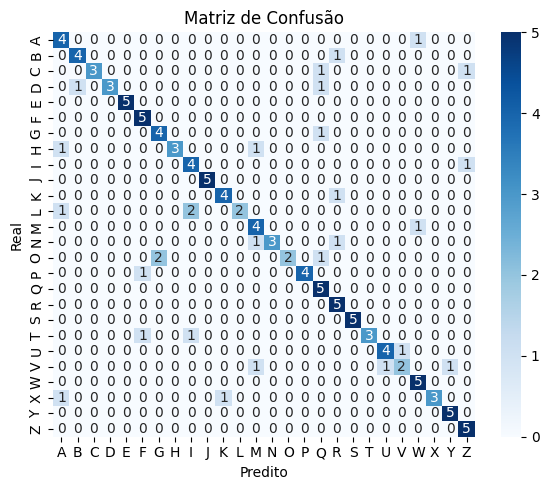

In [10]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (64, n_inputs, ReLU()),
    (n_classes, 64, Sigmoid())
]

trainer = BackPropagationES(LossMSE(), learning_rate=0.1, epochs=200)
mlp = MLP(configs, trainer)

# Treinamento
mlp.train(X_train, y_train)

# Avaliação
predictions = mlp.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
real_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == real_classes)
print(f"Acurácia final: {accuracy:.4f}")

getConfusionMatrix(real_classes, predicted_classes)

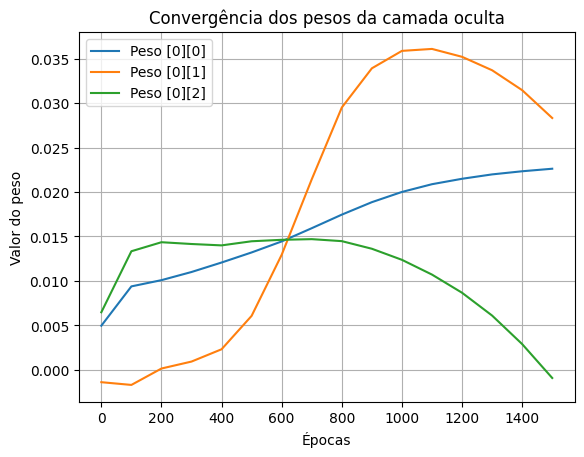

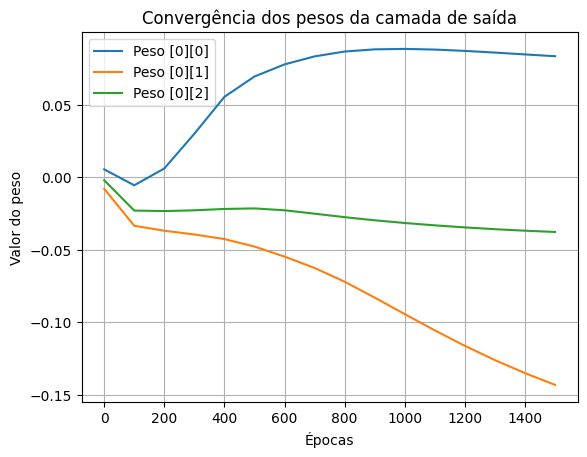

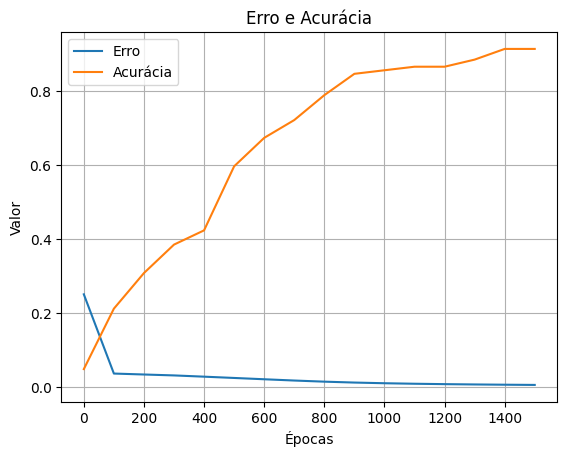

In [16]:
import matplotlib.pyplot as plt

# Valores dos pesos ao longo de 8 épocas (exemplo)
pesos_camada1 = [0.00496714,-0.00138264,0.00647689,
5.32783209e-03,-8.05526683e-03,-2.15113800e-03,
0.0093885,-0.00168966,0.01333909,
-0.00565021,-0.03357656,-0.02308192,
1.00890673e-02,1.54147465e-04,1.43537524e-02,
0.00594765,-0.03697974,-0.02342104,
0.01100548,0.00093587,0.01415376,
0.02991595,-0.03955226,-0.02289797,
0.0120716,0.00231879,0.01399844,
0.05532881,-0.04272692,-0.02196221,
0.01320512,0.00607656,0.01446145,
0.0693533,-0.04790568,-0.02158398,
0.01444254,0.01294247,0.01462523,
0.07770862,-0.05481312,-0.02288084,
0.01592985,0.02142812,0.01469995,
0.08322958,-0.062677,-0.0252315,
0.01745584,0.02950031,0.01447542,
0.086567,-0.0721403,-0.02762227,
0.01885765,0.03390693,0.01361955,
0.08806946,-0.08309864,-0.02978758,
0.02000646,0.0358664,0.01237494,
0.08836594,-0.094466,-0.03164106,
0.02087709,0.03608655,0.01071474,
0.08792017,-0.10569755,-0.03327055,
2.14873514e-02,3.51991126e-02,8.67209670e-03,
8.69957842e-02,-1.16357148e-01,-3.46842513e-02,
0.02197952,0.03368791,0.00610734,
0.08583671,-0.1262011,-0.03590531,
0.02233169,0.0314482,0.0029002,
0.08457594,-0.13514573,-0.03695505,
0.02261656,0.02831835,-0.00091092,
0.08332619,-0.14327813,-0.03782219]

p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
p6 = []

e = [0.250217,
0.036075,
0.033514,
0.031025,
0.027649,
0.024177,
0.020655,
0.017209,
0.014166,
0.011734,
0.009902,
0.008523,
0.007454,
0.006607,
0.005921,
0.005347]

acc = [0.0481,
0.2115,
0.3077,
0.3846,
0.4231,
0.5962,
0.6731,
0.7212,
0.7885,
0.8462,
0.8558,
0.8654,
0.8654,
0.8846,
0.9135,
0.9135]

for i in range(0, len(pesos_camada1), 6):
    p1.append(pesos_camada1[i])
    p2.append(pesos_camada1[i+1])
    p3.append(pesos_camada1[i+2])
    p4.append(pesos_camada1[i+3])
    p5.append(pesos_camada1[i+4])
    p6.append(pesos_camada1[i+5])

epocas = list(range(0, 1501, 100))

# Plotando a convergência
plt.plot(epocas, p1, label="Peso [0][0]")
plt.plot(epocas, p2, label="Peso [0][1]")
plt.plot(epocas, p3, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada oculta")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, p4, label="Peso [0][0]")
plt.plot(epocas, p5, label="Peso [0][1]")
plt.plot(epocas, p6, label="Peso [0][2]")
plt.xlabel("Épocas")
plt.ylabel("Valor do peso")
plt.title("Convergência dos pesos da camada de saída")
plt.legend()
plt.grid(True)
plt.show()

# Plotando a convergência
plt.plot(epocas, e, label="Erro")
plt.plot(epocas, acc, label="Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Erro e Acurácia")
plt.legend()
plt.grid(True)
plt.show()

### Validação Cruzada

In [21]:
def accurancy(predictions, targets):
    predicted_classes = np.argmax(predictions, axis=1)
    real_classes = np.argmax(targets, axis=1)
    return np.mean(predicted_classes == real_classes)

In [39]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (80, n_inputs, ReLU()),
    (n_classes, 80, Sigmoid())
]

trainer = BackPropagationCV(LossMSE(), learning_rate=0.3, epochs=800)
mlp = MLP(configs, trainer)

# Treinamento
results = mlp.train(X_train, y_train, k=5)

accuracies_folds = []

for rs in results:
    acc = np.mean(accurancy(rs['predictions'], rs['targets']))
    print(f"Acurácia do fold: {acc:.4f}")
    accuracies_folds.append(acc)

# Cálculo da média geral e desvio padrão
mean_acc = np.mean(accuracies_folds)
std_acc = np.std(accuracies_folds)

print(f"MÉDIA: {mean_acc:.4f}")
print(f"DESVIO PADRÃO: {std_acc:.4f}\n")

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 800
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

nos slides, gera uma tabela com esses valores para facilitar a visualização

### Matriz de Confusão

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import string  # Para pegar as letras do alfabeto

def getConfusionMatrix(real, pred):
    # Supondo que você já tenha real_classes e predicted_classes
    cm = confusion_matrix(real, pred)
    labels = list(string.ascii_uppercase)  # ['A', 'B', ..., 'Z']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()


      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 100
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

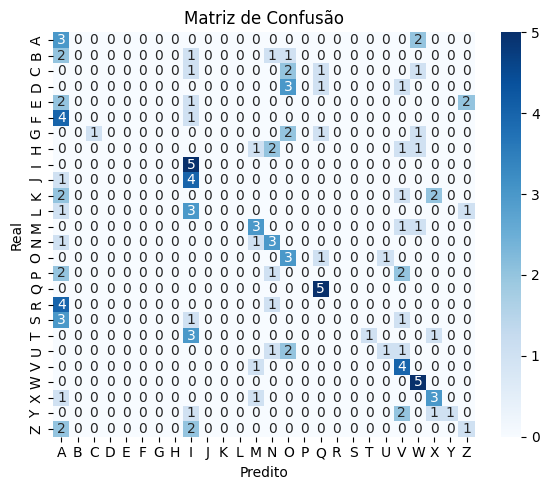

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 150
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

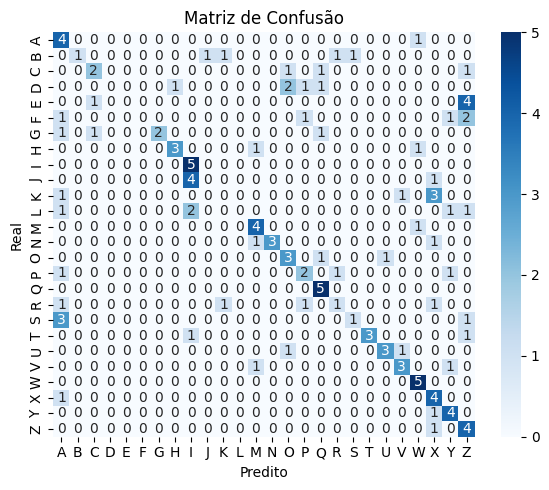

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 200
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

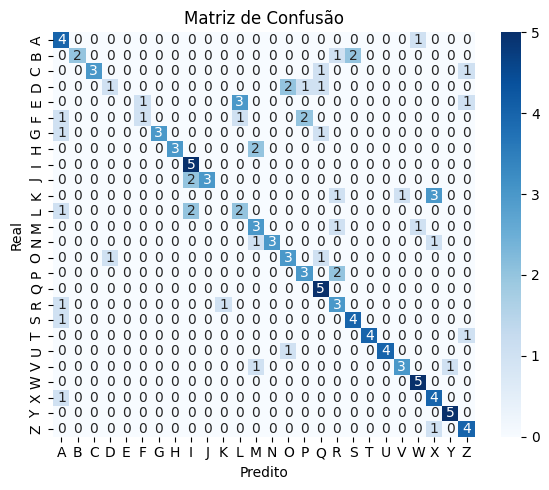

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 400
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

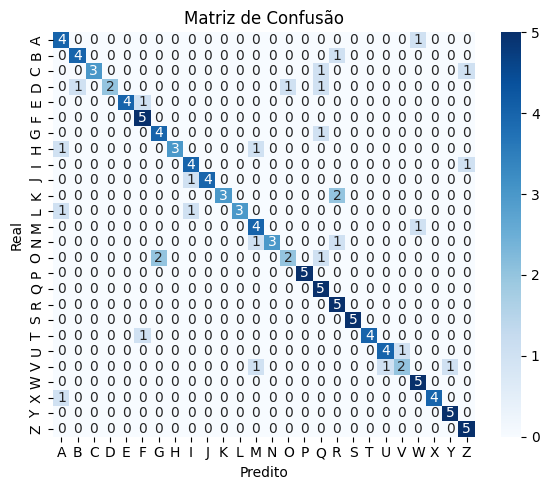

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 800
Learning rate: 0.3
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

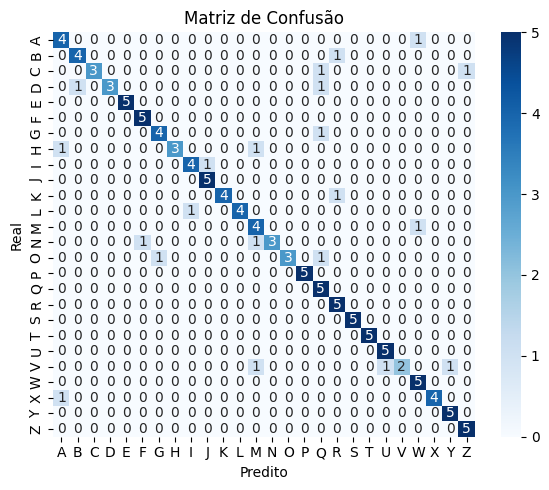

In [35]:
from sklearn.metrics import confusion_matrix

epocas = [100, 150, 200, 400, 800]
for epoca in epocas:
    np.random.seed(42)
    random.seed(42)

    # Define arquitetura da MLP
    n_inputs = X.shape[1]
    configs = [
        (80, n_inputs, ReLU()),
        (n_classes, 80, Sigmoid())
    ]

    trainer = BackPropagation(LossMSE(), learning_rate=0.3, epochs=epoca)
    mlp = MLP(configs, trainer)

    # Treinamento
    mlp.train(X_train, y_train)

    # Avaliação
    predictions = mlp.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    real_classes = np.argmax(y_test, axis=1)
    accuracy = np.mean(predicted_classes == real_classes)
    print(f"Acurácia final: {accuracy:.4f}")

    getConfusionMatrix(real_classes, predicted_classes)

      🧠  Multi-Layer Perceptron Created! 🧠
Multi-Layer Perceptron Configuration
Epochs: 400
Learning rate: 0.6
Number of layers: 2
Architecture:
  Layer 1: 80 neurons - Activation: ReLU
  Layer 2: 26 neurons - Activation: Sigmoid

PESOS INICIAIS
[[ 0.00496714 -0.00138264  0.00647689 ... -0.00299007  0.00091761
  -0.01987569]
 [-0.00219672  0.00357113  0.01477894 ...  0.00473833 -0.01191303
   0.00656554]
 [-0.00974682  0.00787085  0.01158596 ...  0.00186454 -0.00661786
   0.00852433]
 ...
 [ 0.01423954  0.0141377  -0.00029173 ... -0.00108528  0.00826839
  -0.00104009]
 [-0.01758209 -0.00251118 -0.00972162 ...  0.0119053  -0.00200685
  -0.00404696]
 [ 0.01029604  0.0198247   0.0095376  ... -0.00037564  0.00569759
  -0.00324177]]


[[-0.02197501  0.01268714  0.00190223 ...  0.00891878 -0.01227014
  -0.00679906]
 [ 0.00184963  0.02401584 -0.0086319  ...  0.00214983  0.01123427
   0.00676994]
 [ 0.00192862  0.01518422  0.00420269 ...  0.01484642 -0.01026354
   0.01589441]
 ...
 [-0.0110634

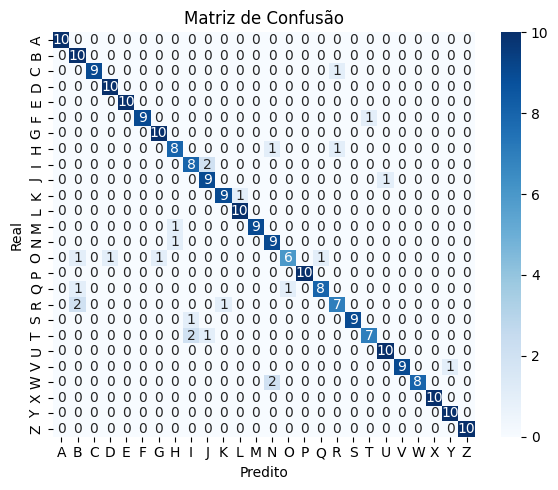

Acurácia fold: 0.8889


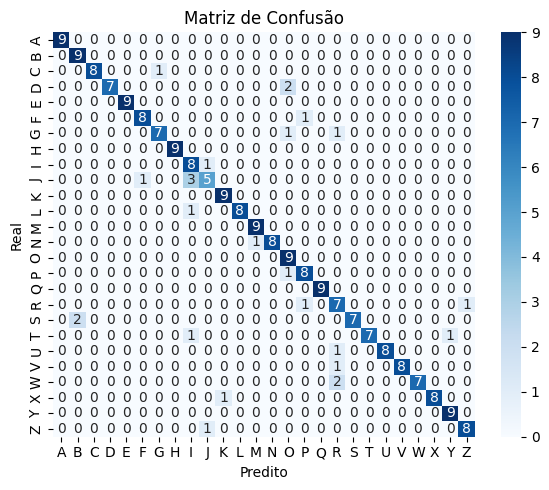

Acurácia fold: 0.8761


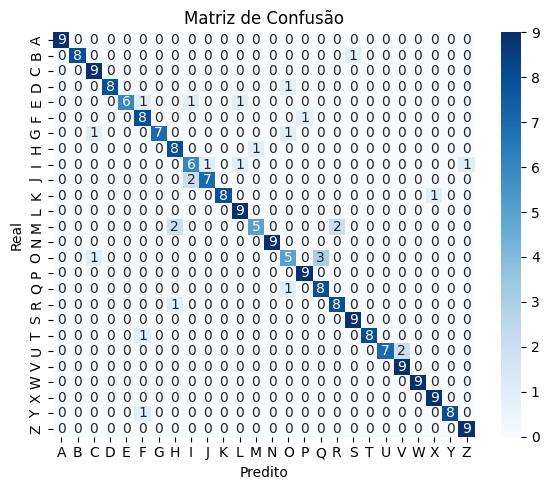

Acurácia fold: 0.9231


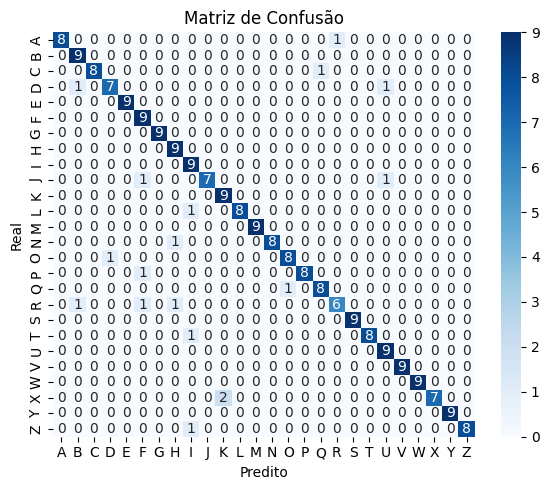

Acurácia fold: 0.9359


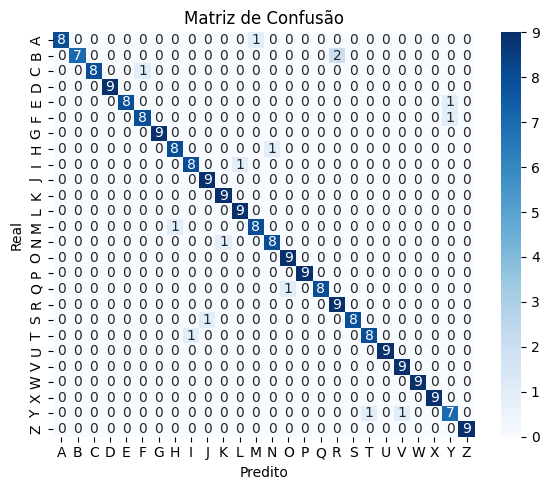

MÉDIA: 0.9048
DESVIO PADRÃO: 0.0219



In [46]:
np.random.seed(42)
random.seed(42)

# Define arquitetura da MLP
n_inputs = X.shape[1]
configs = [
    (80, n_inputs, ReLU()),
    (n_classes, 80, Sigmoid())
]

trainer = BackPropagationCV(LossMSE(), learning_rate=0.6, epochs=400)
mlp = MLP(configs, trainer)

# Treinamento
results = mlp.train(X_train, y_train, k=5)

accuracies_folds = []

for rs in results:
    predicted_classes = np.argmax(rs['predictions'], axis=1)
    real_classes = np.argmax(rs['targets'], axis=1)
    accuracy = np.mean(predicted_classes == real_classes)
    print(f"Acurácia fold: {accuracy:.4f}")
    getConfusionMatrix(real_classes, predicted_classes)
    accuracies_folds.append(accuracy)

# Cálculo da média geral e desvio padrão
mean_acc = np.mean(accuracies_folds)
std_acc = np.std(accuracies_folds)

print(f"MÉDIA: {mean_acc:.4f}")
print(f"DESVIO PADRÃO: {std_acc:.4f}\n")